##Importing Libraries

In [6]:
!pip install sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score




[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'sklearn'

##Data Loading And Cleaning

In [3]:
# data = pd.read_csv("/content/spam.csv") #was giving error thus tryong encoding



data = pd.read_csv("/content/spam.csv", encoding="latin-1")  # Try reading with Latin-1 encoding

In [4]:
data.shape

(5572, 5)

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#dropping 3 last columns as having non null
data.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#renaming thr columns
data.rename(columns={"v1": "target", "v2": "text"}, inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#applying label encoder
encoder = LabelEncoder()

In [11]:
encoder.fit_transform(data['target']) #ham = 0, spam = 1

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
data['target'] = encoder.fit_transform(data['target'])

In [13]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#checking for missing values
data.isnull().sum()  #no missing values

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
data.duplicated().sum() #found 403 duplicates


403

In [16]:
#removing duplicates
data = data.drop_duplicates(keep = 'first')


In [17]:
data.shape #revised shape od dataset

(5169, 2)

##Exploratory Data Analysis

In [18]:
data.value_counts('target') #ham = 4516, #spam = 653

target
0    4516
1     653
Name: count, dtype: int64

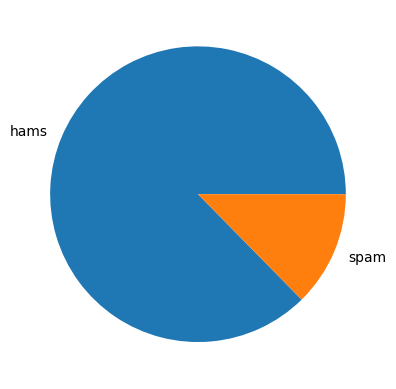

In [19]:
#pie chart
plt.pie(data['target'].value_counts(),labels = ['hams','spam'])
plt.show()
#Data is imbalaced

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
#number of characters
data['num_char'] = data['text'].apply(len)

In [23]:
#number of words
data['mum_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
#number of sentenes
data['sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
data.head()

,target,text,num_char,mum_words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
data[['num_char','mum_words','sentences']].describe()

,num_char,mum_words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
data[data['target'] == 0][['num_char','mum_words','sentences']].describe()  #for ham messages

,num_char,mum_words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
data[data['target'] == 1][['num_char','mum_words','sentences']].describe()  #for spam messages

,num_char,mum_words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: ylabel='Count'>

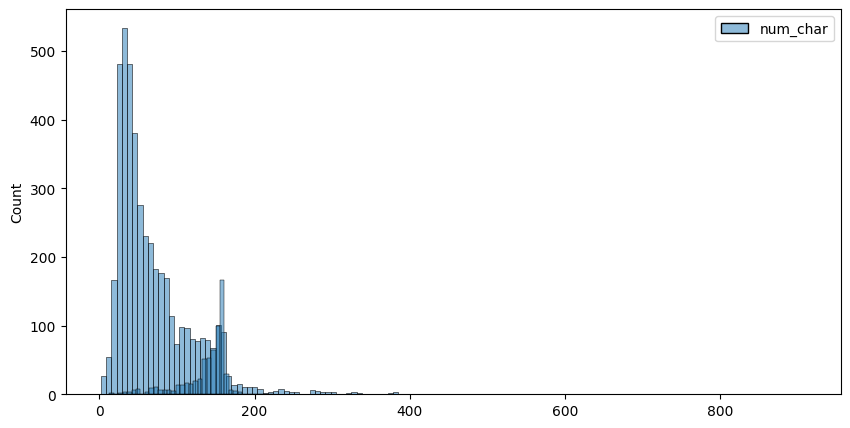

In [40]:
plt.figure(figsize = (10,5))
sns.histplot(data[data['target'] == 0][['num_char']]) #for hams
sns.histplot(data[data['target'] == 1][['num_char']],color = 'red') #for spam


<Axes: ylabel='Count'>

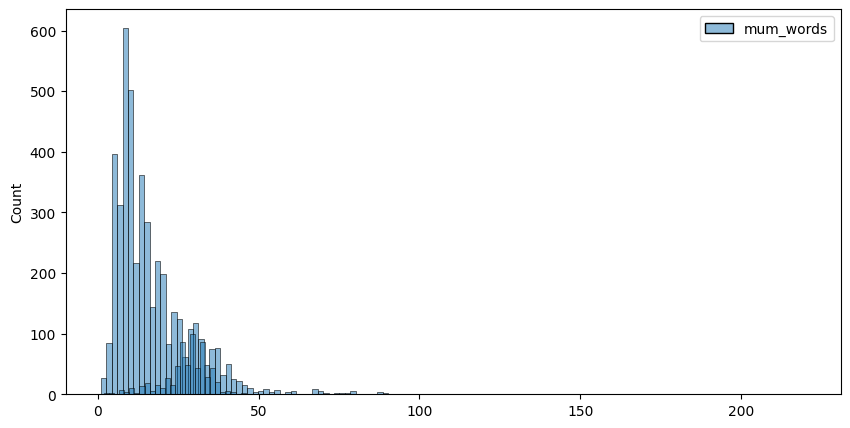

In [43]:
plt.figure(figsize = (10,5))
sns.histplot(data[data['target'] == 0][['mum_words']]) #for hams
sns.histplot(data[data['target'] == 1][['mum_words']],color = 'red') #for spam

<Axes: ylabel='Count'>

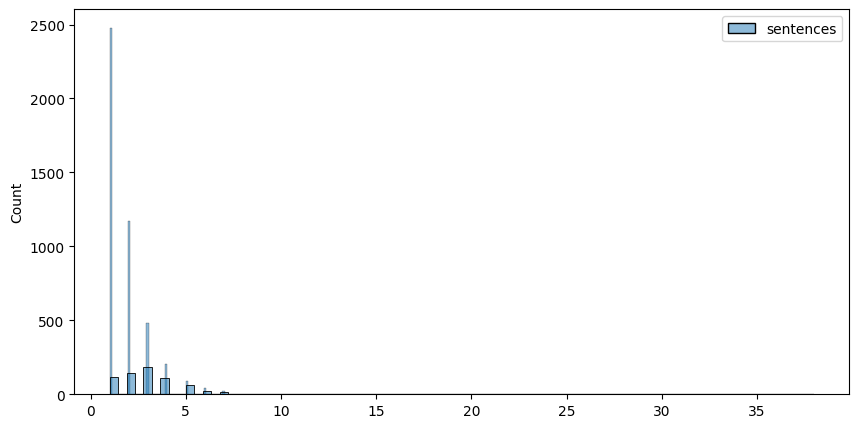

In [44]:
plt.figure(figsize = (10,5))
sns.histplot(data[data['target'] == 0][['sentences']]) #for hams
sns.histplot(data[data['target'] == 1][['sentences']],color = 'red') #for spam

we can see above that the number of characters, number of words and number of sentences are more in spam

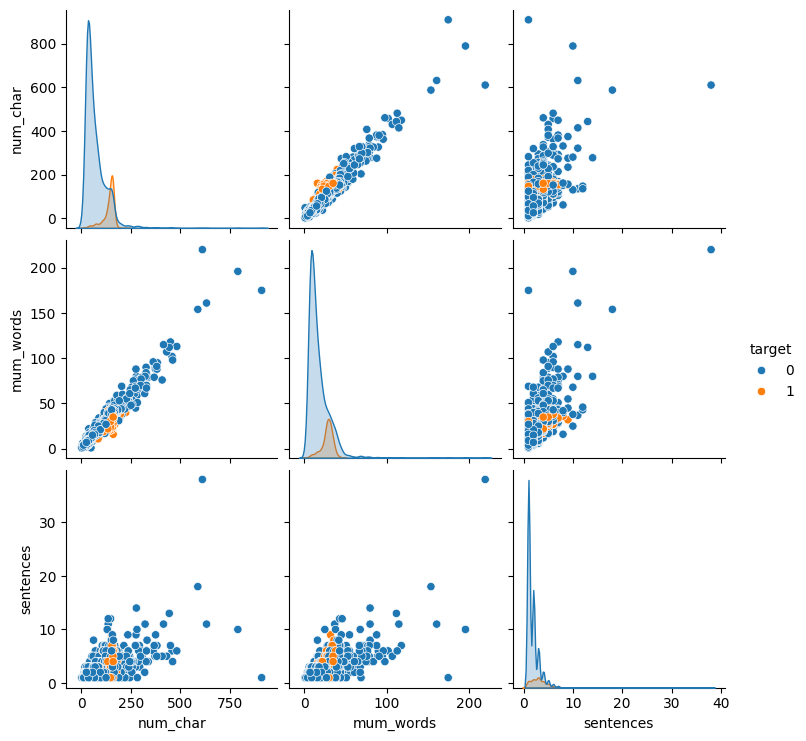

In [46]:
sns.pairplot(data, hue = 'target') #describing the relationships , data has outliers

In [50]:
#calculating the correlation, faced an  error here

# Convert relevant columns to numeric type if they are not already
# For example, if 'mum_words' and 'sentences' are numeric but others are not:
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlations on the numeric subset
correlation_matrix = numeric_data.corr()

<Axes: >

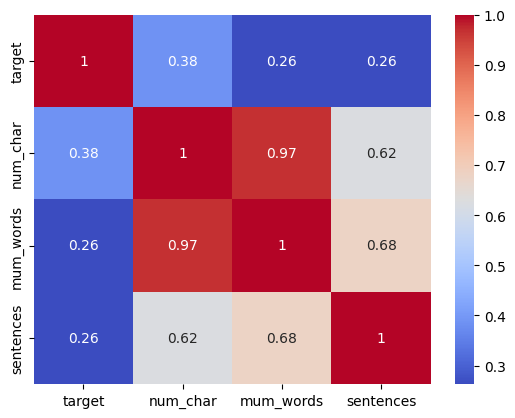

In [52]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') #has multi correlation , we will take only num_char

##Data Preprocessing
Lower Case, Tokenization, Removing Special Characters, Removing Stop Words, Removing Punctuation, Stemming

In [99]:
from tkinter import Y
#lower case
def transform_text(text):
  text = text.lower()#Lower case
  text = nltk.word_tokenize(text) #tokenization
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)  # removed the special character

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i) #removed the stop words and punctuation

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [100]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [94]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [91]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [97]:
data['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [101]:
data['transformed_text'] = data['text'].apply(transform_text)

In [103]:
data.head()

,target,text,num_char,mum_words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [104]:
#word cloud will highlight important words

In [105]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [109]:
spam_wordcloud = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

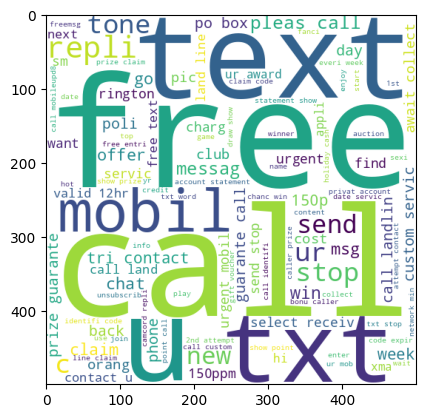

In [110]:
plt.imshow(spam_wordcloud)

In [112]:
ham_wordcloud = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

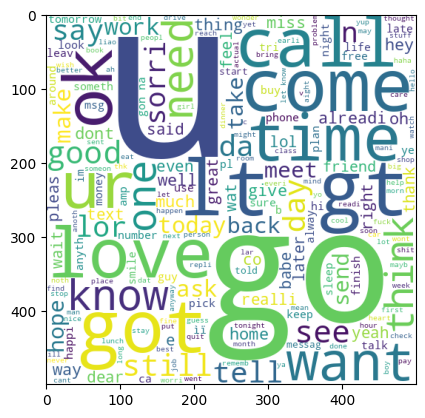

In [113]:
plt.imshow(ham_wordcloud)

top 50 ham and spam words

In [115]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [117]:
len(spam_corpus)

9939

In [122]:
from collections import Counter
# Count the occurrences of each word in the spam corpus
word_counts = Counter(spam_corpus)

# Create a DataFrame from the most common words
df = pd.DataFrame(word_counts.most_common(50), columns=['Word', 'Count'])

df

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


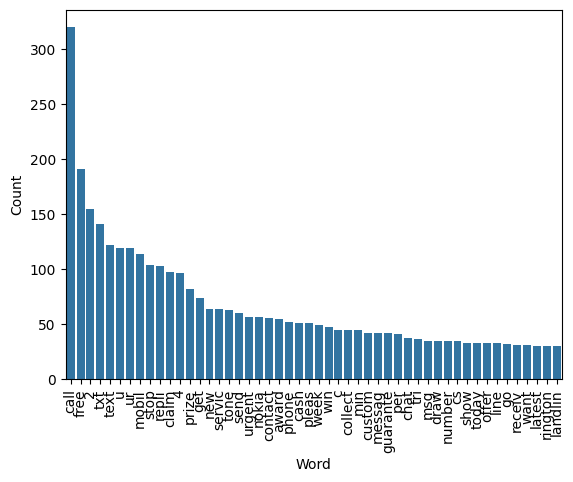

In [124]:
# Plot the barplot using the DataFrame
sns.barplot(x='Word', y='Count', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [127]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [128]:
len(ham_corpus)

35404

In [129]:
from collections import Counter
# Count the occurrences of each word in the spam corpus
word_counts = Counter(ham_corpus)

# Create a DataFrame from the most common words
df = pd.DataFrame(word_counts.most_common(50), columns=['Word', 'Count'])

df

,Word,Count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


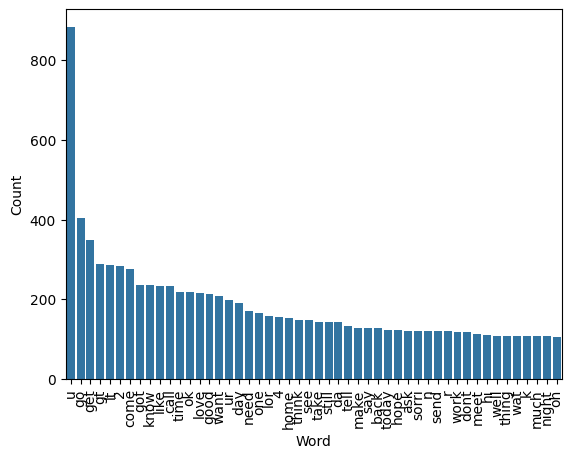

In [130]:
# Plot the barplot using the DataFrame
sns.barplot(x='Word', y='Count', data=df)
plt.xticks(rotation='vertical')
plt.show()

##Model Building


Naive Bayes

In [230]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [231]:
X = cv.fit_transform(data['transformed_text']).toarray() # sparse to dense

In [232]:
x = tfidf.fit_transform(data['transformed_text']).toarray()

In [233]:
X.shape

(5169, 6708)

In [234]:
x.shape

(5169, 6708)

In [235]:
Y = data['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [236]:
y = data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [240]:
#for x and y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [239]:
#for X and Y
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [241]:
#for x and y
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [242]:
#for X and Y
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [243]:
#for x and y
Gnb = GaussianNB()
Mnb = MultinomialNB()
Bnb = BernoulliNB()

In [244]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))   #score of 88
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))   # score of 53.1 #not performing well

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [245]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))   #score of 96.4
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2)) #score of 83.4 #not performing well

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [246]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))   #score of 97
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3)) #score of 97.1

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [247]:
Gnb.fit(x_train,y_train)
y_pred4 = Gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))   #score of 97
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3)) #score of 97.3

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [248]:
Mnb.fit(X_train,y_train)
y_pred5 = Mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred5))   #score of 96.4
print(confusion_matrix(Y_test,y_pred5))
print(precision_score(Y_test,y_pred5)) #score of 90.4

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [249]:
Bnb.fit(x_train,y_train)
y_pred6 = Bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred6))   #score of 97
print(confusion_matrix(Y_test,y_pred6))
print(precision_score(Y_test,y_pred6)) #score of 97.3 #not performing well

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


we will choose tfid - BNB

#comparng with other models

In [199]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [200]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [201]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [202]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [203]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [204]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9245647969052224
Precision -  0.9166666666666666
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [207]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.924565,0.916667
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


K- Nearest Neighbour and Random Forest performing good

In [209]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.970986
4,xgb,Accuracy,0.973888
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,DT,Accuracy,0.924565
8,BgC,Accuracy,0.962282
9,NB,Accuracy,0.964217


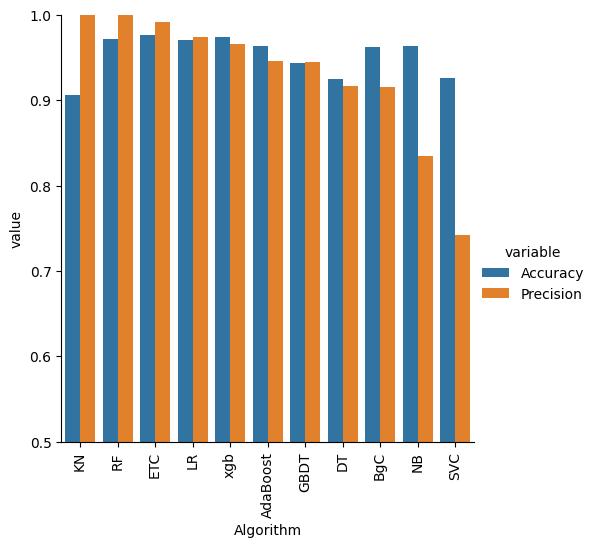

In [210]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

##Model Improvisation

In [251]:
#voting classifier  = combination of best perfoeming algorithms
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [252]:
from sklearn.ensemble import VotingClassifier

In [254]:
voting = VotingClassifier(estimators=[('knc',knc),('rfc',rfc),('etc',etc)],voting='soft')

In [262]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('knc', KNeighborsClassifier()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [264]:
y_pred_f = voting.predict(X_test)
print(accuracy_score(Y_test,y_pred_f))   #score of 94
print(confusion_matrix(Y_test,y_pred_f))
print(precision_score(Y_test,y_pred_f)) #score of 1
#very perfect and expected

0.9448742746615088
[[896   0]
 [ 57  81]]
1.0


In [ ]:
#stacking

In [259]:
estimators = [('knc',knc),('rfc',rfc),('etc',etc)]
final_estimator = XGBClassifier()

In [260]:
from sklearn.ensemble import StackingClassifier

In [261]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [265]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('knc', KNeighborsClassifier()),
                               ('rfc',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stop...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [266]:
y_pred_s = clf.predict(X_test)
print(accuracy_score(Y_test,y_pred_s))   #score of 97
print(precision_score(Y_test,y_pred_s)) #score of 95

#not much usefull

0.9777562862669246
0.952755905511811


we can go with voting model

#working model Pipelining

In [267]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))

In [269]:
!pip install streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [4]:
import pickle
import streamlit as st
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
  text = text.lower()#Lower case
  text = nltk.word_tokenize(text) #tokenization
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)  # removed the special character

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i) #removed the stop words and punctuation

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

tfidf = pickle.load(open("vectorizer.pkl","rb"))
model = pickle.load(open("model.pkl","rb"))

st.title("Email/SMS Spam Classifier By Atishay")

input_sms = st.text_input("Enter the SMS")
if st.button("Predict"):
  # 1. preprocessing
  transformed_sms = transform_text(input_sms)
  # 2. vectorize
  vector_input = tfidf.transform([transformed_sms])
  # 3. predict
  result = model.predict(vector_input)[0]
  # 4. Display
  if result == 1:
    st.header("Spam")
  else:
    st.header("Not Spam")


ModuleNotFoundError: No module named 'sklearn'

['sms_classification.pkl']

Public URL: NgrokTunnel: "https://0a8e-35-223-37-29.ngrok-free.app" -> "http://localhost:5000"
